#### Semana 2 - Aprendizado supervisionado

Classificar as espécies de flores de íris. Uma das classes é linearmente separável das outras duas classes. Estas últimas não são linearmente separáveis.

Fonte: https://archive.ics.uci.edu/ml/datasets/iris

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap

In [10]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [11]:
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42) # max_iter = epoca_max; tol = limiar de precisao; random_state = sempre os mesmos pesos no sorteio
per_clf.fit(X, y)
print('Perceptron treinado!')
print('Os pesos encontrados foram {} e o bias foi {}.'.format(per_clf.coef_, per_clf.intercept_))

y_pred = per_clf.predict([[2, 0.5]])
y_pred

Perceptron treinado!
Os pesos encontrados foram [[1.5 2.2]] e o bias foi [-5.].


array([0])

Perceptron treinado!
Os pesos encontrados foram [[0.9 1.7]] e o bias foi [-3.].


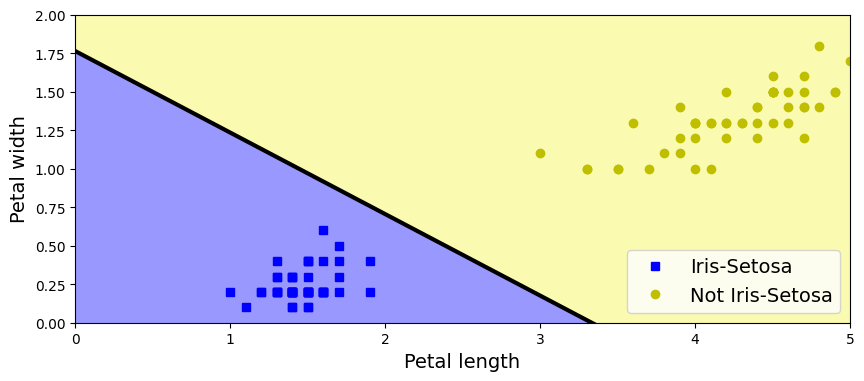

In [12]:
per_clf = Perceptron(max_iter=2000, tol=1e-3) # max_iter = epoca_max; tol = limiar de precisao
per_clf.fit(X, y)

print('Perceptron treinado!')
print('Os pesos encontrados foram {} e o bias foi {}.'.format(per_clf.coef_, per_clf.intercept_))

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Not Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()